In [59]:
import matplotlib.pyplot as plt
import math
import numpy as np
#CREATE A RANDOM DATASET
def createDateSet(nData,noiseSTD=0.1):
    #随机产生nData个x轴的坐标
    x=2*(np.random.rand(nData)-0.5)
    x=list(x)
    #matlab的inline函数，python的lamabda函数
    #DEFINE AND TARGET FUNCTION f(x)
    f=lambda x:(math.sin(math.pi*x))
    y=[f(value) for value in x ]
    
    x=np.array(x)
    y=np.array(y)+noiseSTD*np.array(np.random.randn(len(x)))
    
    return x,y

#多项式拟合，返回参数
def fitPolyNomial(x,y):
    degreee=[1,3,10]
    #建立字典用来保存参数
    theta={}
    for iD in range(len(degreee)):
        theta[iD]=polyfit(x,y,degreee[iD])
    return theta

In [77]:
#一元多项式拟合
import numpy as np
class fitting:
    def __init__(self,X,Y):
        self.x=np.array(X)
        self.y=np.array(Y)
    def fitting(self,n):
        self.theta=np.polyfit(self.x,self.y,n)
        self.func=np.poly1d(self.theta)
        return self.theta,self.func
    def predict(self,x):
        return np.polyval(self.theta,x)

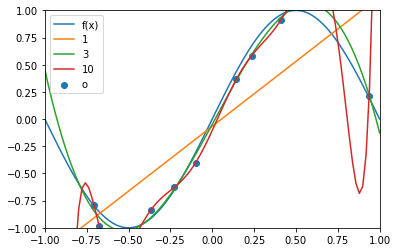

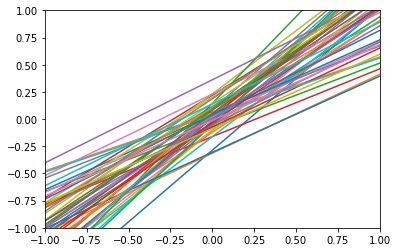

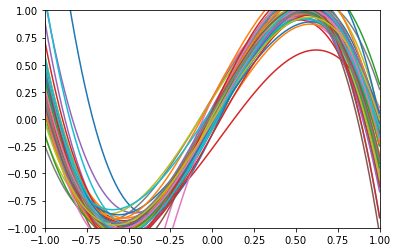

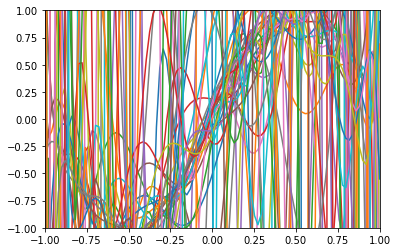

In [98]:
#关闭警告提醒
import warnings
warnings.simplefilter('ignore', np.RankWarning)
#主函数
if __name__=='__main__':
    xGrid=np.linspace(-1,1,100)
    yy=[math.sin(math.pi*x) for x in xGrid]
    import matplotlib.pyplot as plt
    #打散点图
    fig0=plt.figure(0)
    x,y=createDateSet(10)
    
    #多项式拟合
    degree=[1,3,10]
    #theta={}
    cols = [[0.8,0.05,0.05],[0.05,0.6,0.05],[0.05,0.05,0.6]]
    
    fig1=plt.figure(0)
    plt.scatter(x,y,marker="o",label='o')
    plt.plot(xGrid,yy,label='f(x)')
    
    for iD in degree:
        #多项式拟合
        #theta[iD]=np.polyfit(x,y,iD)
        #p=np.poly1d(theta[iD])
        #plt.plot(xGrid,np.polyval(p,xGrid),label=str(iD))
        F=fitting(x,y)
        F.fitting(iD)
        predicts=F.predict(xGrid)
        plt.plot(xGrid,predicts,label=str(iD))
        plt.xlim([-1,1])
        plt.ylim([-1,1])
    plt.legend(loc='upper left')
    plt.show()
    
    #产生50个数据集
    K=50
    #用来保存参数，iD是多项式最高的系数
    predicts={1:[],3:[],10:[]}
    for iS in range(K):
        x,y=createDateSet(10)
        for jD in degree:
            F=fitting(x,y)
            F.fitting(jD)
            predicts[jD].append(F.predict(xGrid))
    #展示结果
    for iD in degree:
        plt.figure(iD+1)
        for iS in range(K):
            plt.plot(xGrid,predicts[iD][iS])
        plt.xlim([-1,1])
        plt.ylim([-1,1])
        plt.show()

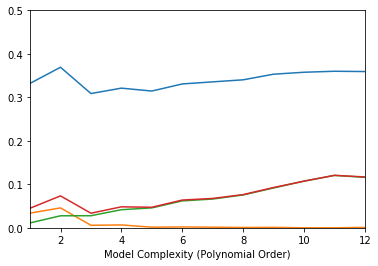

In [149]:
#Expected Prediction Error and the Bias-variance Tradeoff
#每一个观测样本有25个值
N=25
#总共有100个数据集
K=100
noiseSTD=0.5
#用于训练的样本数量
nTrain=int(np.ceil(N*0.9))

#模型最大的复杂度
nPolyMax=12
#初始化参数
xGrid=np.linspace(-1,1,N)
meanPrediction=np.zeros((K,N))
x=np.linspace(-1,1,N)
x=x[np.random.permutation(N)]
f=lambda x:(math.sin(math.pi*x))

yHatTrain={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]}
yHatTest={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]}
trainErrors={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]}
testErrors={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]}

for iS in range(K):
    y=[f(value) for value in x ]
    x=np.array(x)
    y=np.array(y)+noiseSTD*np.array(np.random.randn(len(x)))
    #建立训练数据
    xTrain=x[:nTrain]
    yTrain=y[:nTrain]
    #建立测试数据
    xTest=x[nTrain+1:]
    yTest=y[nTrain+1:]
    for jD in range(1,nPolyMax+1):
        #模型
        F=fitting(xTrain,yTrain)
        #预测
        F.fitting(jD)
        yHatTrain[jD].append(F.predict(xTrain))
        yHatTest[jD].append(F.predict(xTest))
        trainErrors[jD].append(np.mean((yHatTrain[jD]-yTrain)**2))
        testErrors[jD].append(np.mean((yHatTest[jD]-yTest)**2))

#CALCULATE AVERAGE PREDICTION ERROR, BIAS, AND VARIANCE

trainError={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
testError={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
biasSquared={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
variance={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}


for iD in range(1,nPolyMax+1):
    trainError[iD]=np.mean(trainErrors[iD])
    testError[iD]=np.mean(testErrors[iD])
    f=lambda x:(math.sin(math.pi*x))
    yy=[f(value) for value in xTest]
    
    yy=np.array(yy)
    
    biasSquared[iD] = np.mean((np.mean(yHatTest[iD],0)-yy)**2)
    variance[iD] = np.mean(np.var(yHatTest[iD],0))
    
# [~,bestModel] = min(testError);
keys=[1,2,3,4,5,6,7,8,9,10,11,12]
testErrorValue=np.array([testError[key] for key in keys ])
biasSquaredValue=np.array([biasSquared[key] for key in keys ])
varianceValue=np.array([variance[key] for key in keys ])

#DISPLAY
plt.figure(18)
model=np.linspace(1,12,12)
plt.plot(model,testErrorValue)
plt.plot(model,biasSquaredValue)
plt.plot(model,varianceValue)
plt.plot(model,biasSquaredValue + varianceValue)

plt.xlabel('Model Complexity (Polynomial Order)')
plt.xlim([1,12])
plt.ylim([0,0.5])
plt.show()